In [2]:
import pandas as pd
import numpy as np

# Chargement des données
train = pd.read_csv('../data/application_train.csv')
test = pd.read_csv('../data/application_test.csv')


In [3]:

# 1. Pourcentage de valeurs nulles dans train uniquement
null_percentage_train = train.isnull().mean() * 100
null_percentage_train = null_percentage_train[null_percentage_train > 0].sort_values(ascending=False)

print("\nPourcentage de valeurs nulles par colonne dans 'train' :")
print(null_percentage_train)


Pourcentage de valeurs nulles par colonne dans 'train' :
COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


In [4]:
# Calcul du pourcentage de valeurs nulles dans train
null_percentage_train = train.isnull().mean() * 100

# Sélection des colonnes à supprimer (plus de 60% de NaN)
cols_to_drop = null_percentage_train[null_percentage_train > 50].index

# Suppression des colonnes
train_cleaned = train.drop(columns=cols_to_drop)

print(f"Colonnes supprimées (plus de 60% de NaN) :\n{list(cols_to_drop)}")
print(f"\nNouvelle forme du DataFrame : {train_cleaned.shape}")


Colonnes supprimées (plus de 60% de NaN) :
['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']

Nouvelle forme du DataFrame : (307511, 81)


In [5]:
train_cleaned.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Matrice de coorelation avant Drop 


Tableau de corrélation :
                            SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             

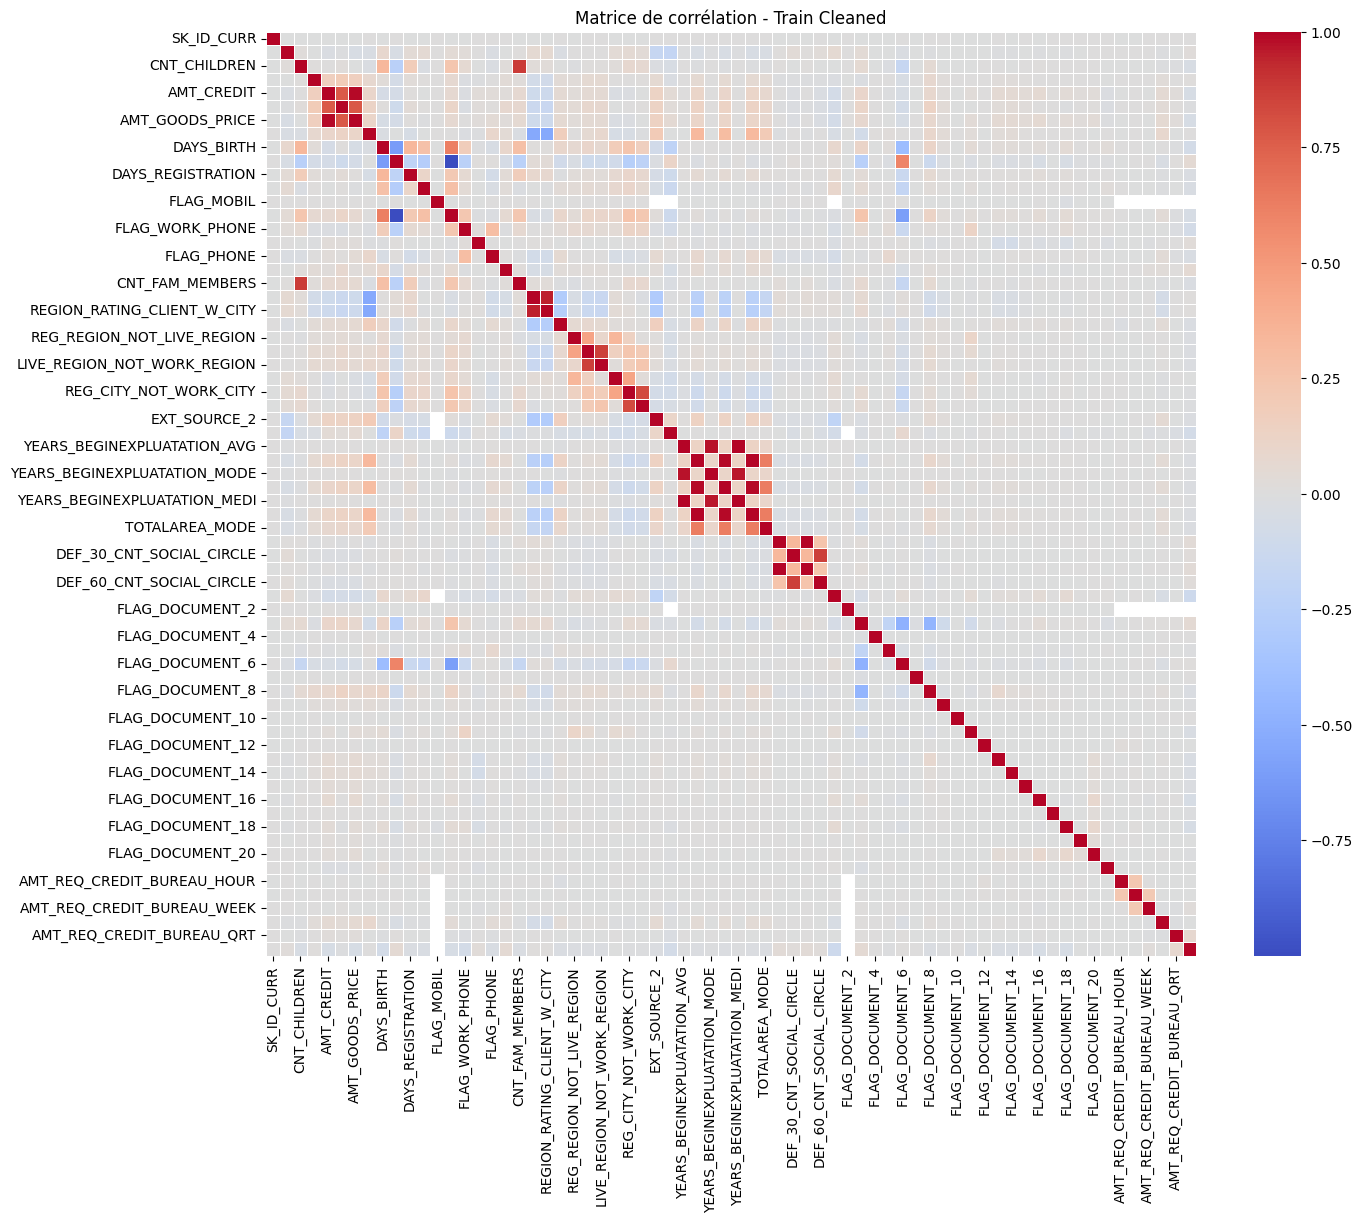

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tableau de corrélation (uniquement les colonnes numériques)
correlation_table = train_cleaned.corr(numeric_only=True)
print("\nTableau de corrélation :")
print(correlation_table)

# 2. Matrice de corrélation (heatmap)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_table, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation - Train Cleaned")
plt.show()


Matrice de coorélation Apres drop

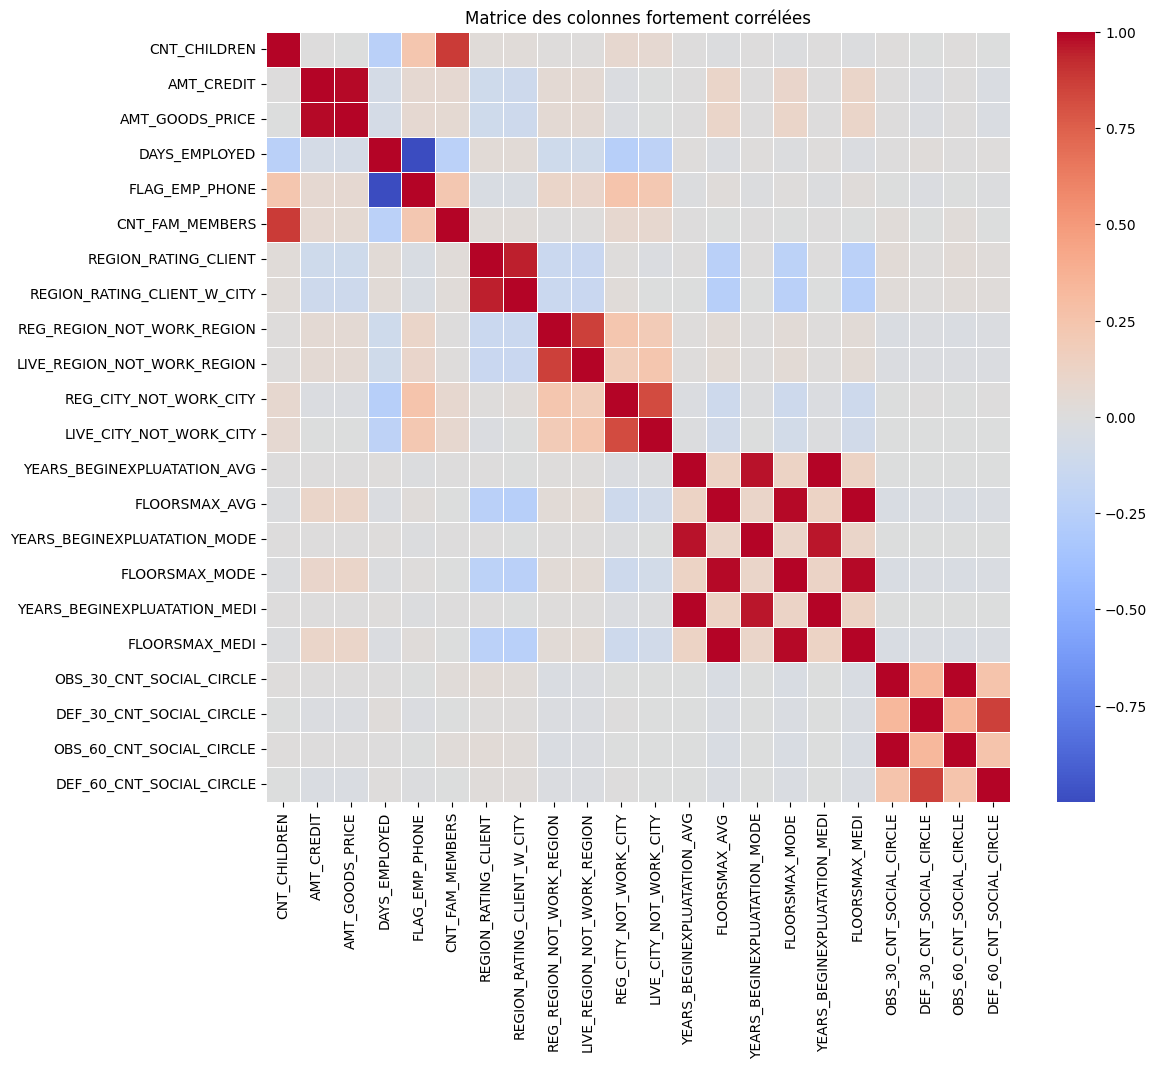

Colonnes conservées (forte corrélation) : ['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
Nouvelle forme du DataFrame : (307511, 22)


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcul de la matrice de corrélation (entre colonnes numériques uniquement)
correlation_matrix = train_cleaned.corr(numeric_only=True)

# 2. Création d'un masque booléen : True si au moins une corrélation forte (hors diagonale)
strong_corr = (correlation_matrix.abs() > 0.8) & (correlation_matrix.abs() < 1.0)
cols_to_keep = strong_corr.any(axis=1)

# 3. Filtrer les colonnes fortement corrélées
train_strong_corr = train_cleaned[cols_to_keep.index[cols_to_keep]]

# 4. Affichage de la nouvelle matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(train_strong_corr.corr(), cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matrice des colonnes fortement corrélées")
plt.show()

print(f"Colonnes conservées (forte corrélation) : {list(train_strong_corr.columns)}")
print(f"Nouvelle forme du DataFrame : {train_strong_corr.shape}")


In [8]:
train_strong_corr['TARGET'] = train['TARGET']



/var/folders/t8/5y2jg4dj2rg_mnzj_85x39580000gp/T/ipykernel_8494/1986152563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_strong_corr['TARGET'] = train['TARGET']


In [9]:
train_strong_corr.head()

,CNT_CHILDREN,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,TARGET
0,0,406597.5,351000.0,-637,1,1.0,2,2,0,0,...,0.0833,0.9722,0.0833,0.9722,0.0833,2.0,2.0,2.0,2.0,1
1,0,1293502.5,1129500.0,-1188,1,2.0,1,1,0,0,...,0.2917,0.9851,0.2917,0.9851,0.2917,1.0,0.0,1.0,0.0,0
2,0,135000.0,135000.0,-225,1,1.0,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0
3,0,312682.5,297000.0,-3039,1,2.0,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0
4,0,513000.0,513000.0,-3038,1,1.0,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0


In [10]:
train_strong_corr.columns

Index(['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
       'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET'],
      dtype='object')

In [11]:
columns_to_keep=['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
       'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [12]:
test=test[columns_to_keep]

FIN DE DATA CLEAN -> DATA PREP ET MODEL

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Séparer les features et la target dans train_strong_corr
X_train = train_strong_corr.drop('TARGET', axis=1)
y_train = train_strong_corr['TARGET']

# Séparer les features dans le test (pas besoin de séparer TARGET car elle n'existe pas dans test)
X_test = test  # Pas besoin de retirer la colonne TARGET ici car elle n'est pas présente dans test

#  Standardisation 
scaler = StandardScaler()

# Appliquer la transformation sur les données 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
# Afficher les statistiques descriptives pour les variables d'entraînement
import pandas as pd

# Pour les données d'entraînement (après standardisation)
train_stats = pd.DataFrame(X_train_scaled, columns=X_train.columns).describe()

# Pour les données de test (après standardisation)
test_stats = pd.DataFrame(X_test_scaled, columns=X_test.columns).describe()

print("Stats pour les données d'entraînement :")
print(train_stats)
print("\nStats pour les données de test :")
print(test_stats)


Stats pour les données d'entraînement :
       CNT_CHILDREN    AMT_CREDIT  AMT_GOODS_PRICE  DAYS_EMPLOYED  \
count  3.075110e+05  3.075110e+05     3.072330e+05   3.075110e+05   
mean  -3.207148e-17 -4.074788e-17     2.268775e-17   4.789927e-17   
std    1.000002e+00  1.000002e+00     1.000002e+00   1.000002e+00   
min   -5.775378e-01 -1.376496e+00    -1.347684e+00  -5.784940e-01   
25%   -5.775378e-01 -8.174760e-01    -8.117460e-01  -4.712426e-01   
50%   -5.775378e-01 -2.124151e-01    -2.392670e-01  -4.602923e-01   
75%    8.072731e-01  5.208178e-01     3.819336e-01  -4.537519e-01   
max    2.573387e+01  8.574059e+00     9.505057e+00   2.133617e+00   

       FLAG_EMP_PHONE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count    3.075110e+05     3.075090e+05          3.075110e+05   
mean     5.628684e-17     1.006746e-16          2.785921e-16   
std      1.000002e+00     1.000002e+00          1.000002e+00   
min     -2.133575e+00    -1.265719e+00         -2.067573e+00   
25%      4.686969e

Distribution

<Figure size 1200x800 with 0 Axes>

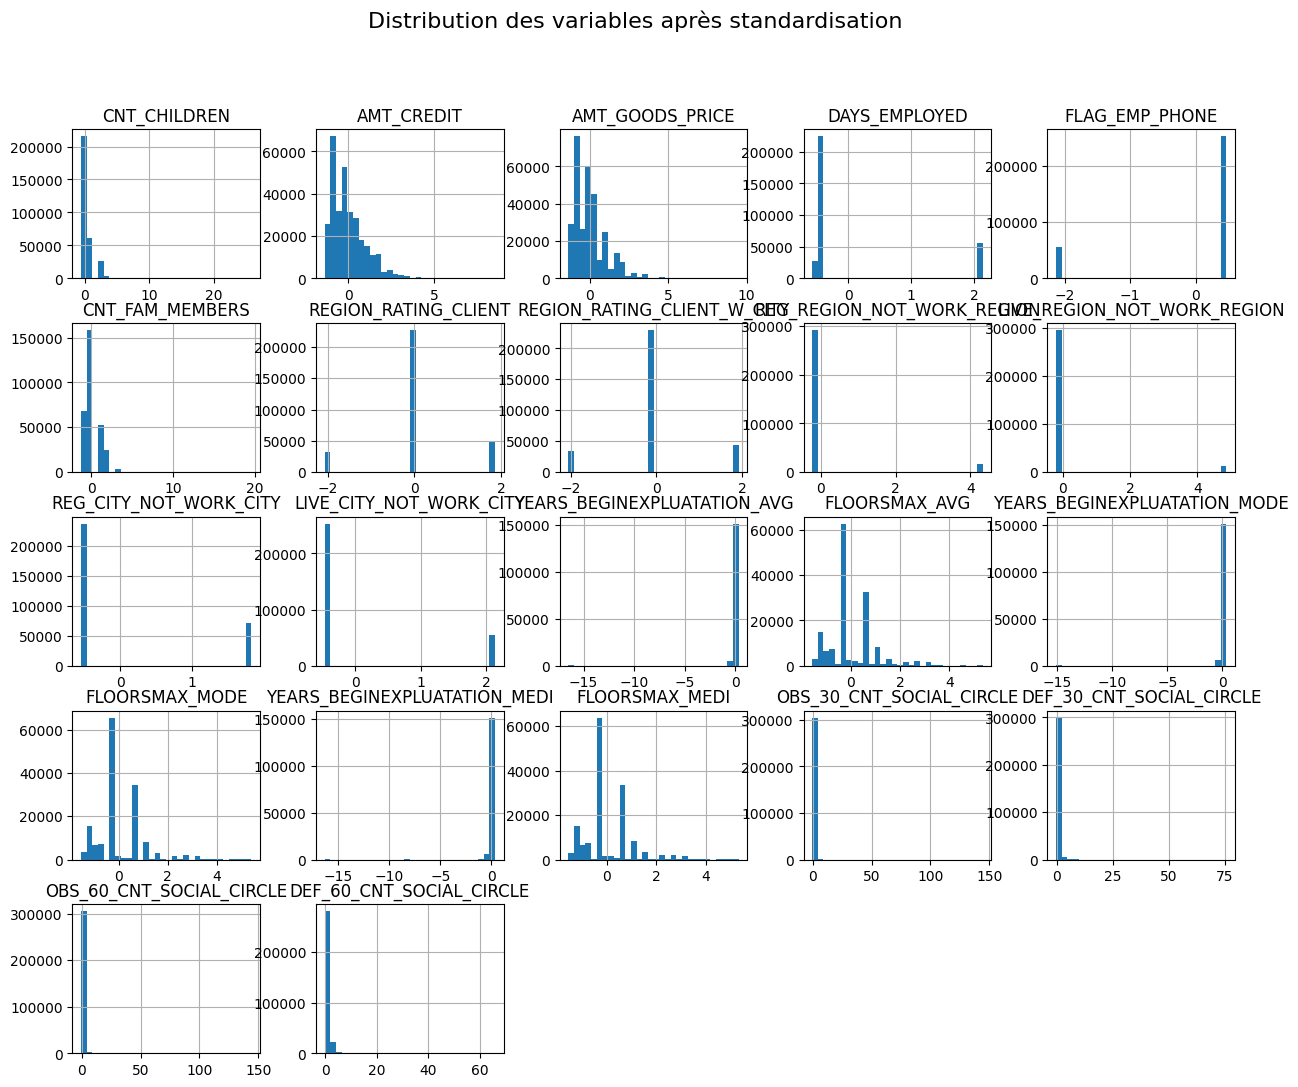

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la distribution de quelques variables après transformation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

plt.figure(figsize=(12, 8))
X_train_scaled_df.hist(bins=30, figsize=(15, 12))
plt.suptitle("Distribution des variables après standardisation", fontsize=16)
plt.show()


Matrice de Coorélaltion 

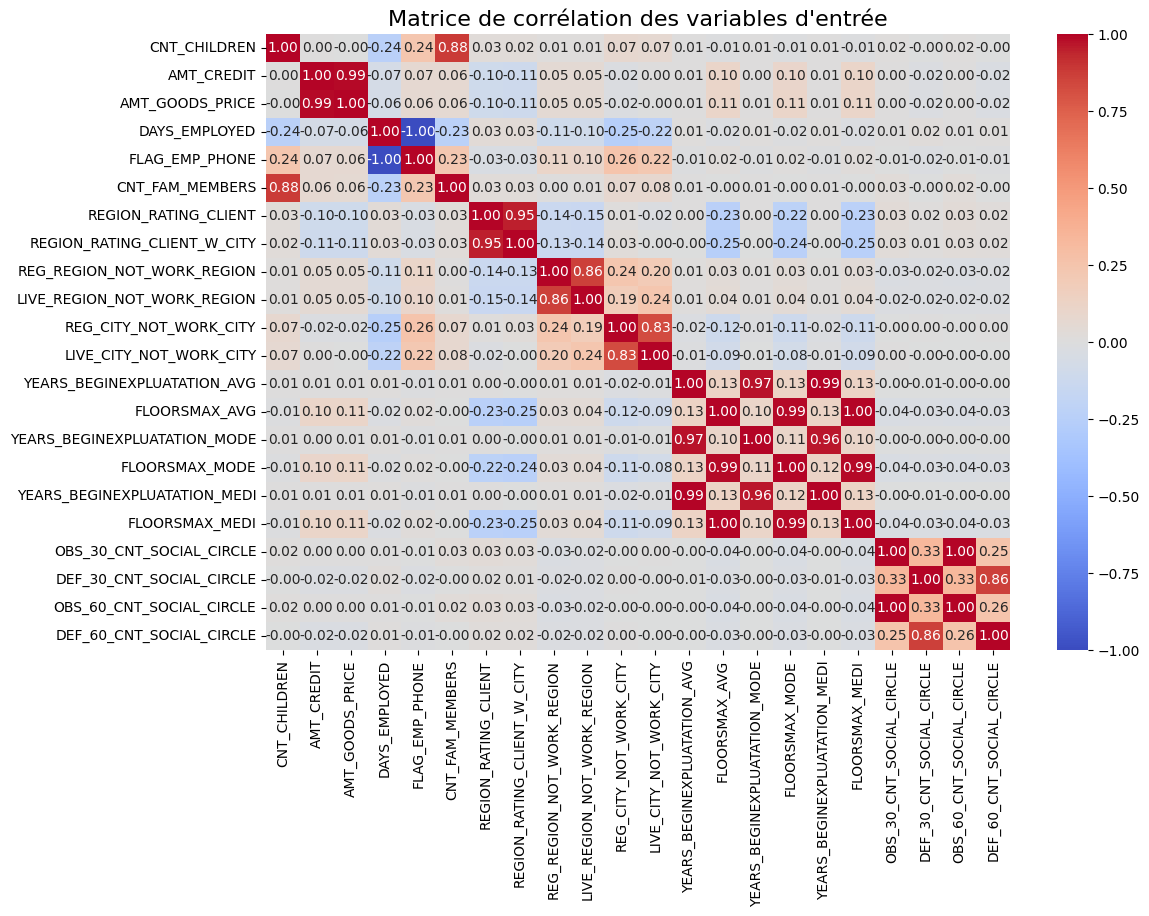

In [16]:
# Calcul de la matrice de corrélation
correlation_matrix = pd.DataFrame(X_train_scaled, columns=X_train.columns).corr()

# Affichage de la matrice de corrélation avec un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables d'entrée", fontsize=16)
plt.show()


In [17]:
# Vérification des valeurs manquantes dans les datasets après nettoyage
print("Valeurs manquantes dans train :", X_train.isnull().sum().sum())


Valeurs manquantes dans train : 913445


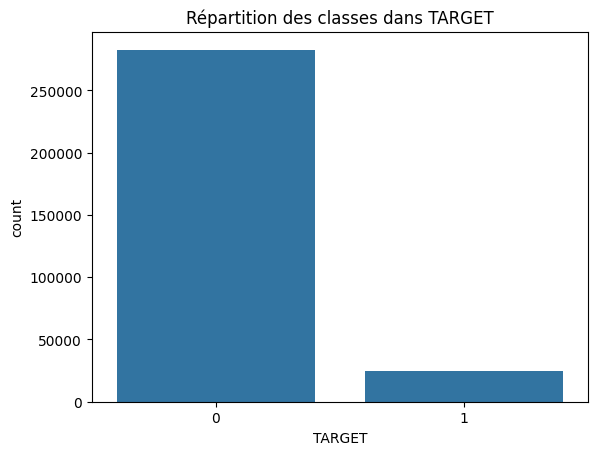

In [18]:
# Vérification de l'équilibre des classes dans y_train
sns.countplot(x=y_train)
plt.title('Répartition des classes dans TARGET')
plt.show()


In [19]:
# from scipy import stats

# # Vérification de la normalité pour quelques variables
# plt.figure(figsize=(12, 8))
# for i, col in enumerate(X_train.columns[:5]):  # On vérifie les 5 premières variables
#     plt.subplot(2, 3, i+1)
#     sns.histplot(X_train_scaled_df[col], kde=True)
#     plt.title(f"Distribution de {col}")
# plt.tight_layout()
# plt.show()

# # Test de normalité (test de Shapiro)
# for col in X_train.columns[:5]:  # On teste les 5 premières variables
#     stat, p_value = stats.shapiro(X_train_scaled_df[col])
#     print(f"{col}: Stat={stat:.3f}, p-value={p_value:.3f}")


In [20]:
# Pour le train
missing_train = X_train.isnull().sum() / len(X_train) * 100
missing_train = missing_train[missing_train > 0]  # Filtrer uniquement les colonnes avec des valeurs manquantes
print("Colonnes avec des valeurs manquantes dans train :")
print(missing_train)



Colonnes avec des valeurs manquantes dans train :
AMT_GOODS_PRICE                  0.090403
CNT_FAM_MEMBERS                  0.000650
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
dtype: float64


In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Pour le train
# plt.figure(figsize=(12, 8))
# sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis')
# plt.title("Carte thermique des valeurs manquantes dans le train")
# plt.show()


Remplir les empty

In [22]:
from sklearn.impute import SimpleImputer

# Imputation de la médiane pour les données numériques
imputer = SimpleImputer(strategy='median')
X_train_cleaned = imputer.fit_transform(X_train)


In [23]:
import pandas as pd

# Convertir en DataFrame pandas
X_train_cleaned = pd.DataFrame(X_train_cleaned, columns=X_train.columns)

# Vérification après traitement
print("Valeurs manquantes dans train après nettoyage :", X_train_cleaned.isnull().sum().sum())


Valeurs manquantes dans train après nettoyage : 0


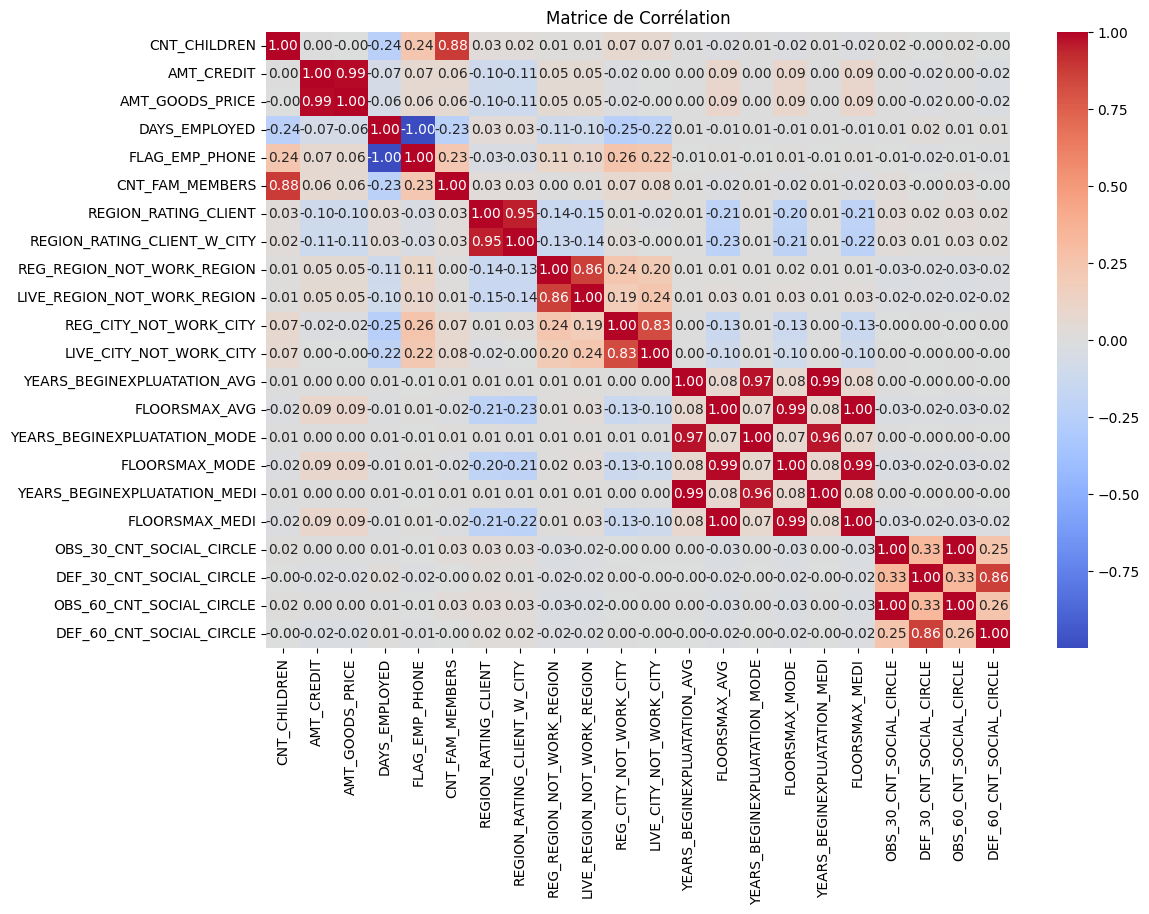

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = X_train_cleaned.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matrice de Corrélation')
plt.show()


In [25]:
# Séparation des features et de la cible
X_train = X_train_cleaned


CREATION DU MODEL 1 RANDOM FOREST

In [26]:
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_split, y_train_split)


RandomForestClassifier(random_state=42)

In [28]:
X_train.describe()


,CNT_CHILDREN,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,FLAG_EMP_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,5.990260e+05,5.383163e+05,63815.045904,0.819889,2.152664,2.052463,2.031521,0.050769,0.040659,...,0.979620,0.196633,0.979277,0.194641,0.979629,0.196440,1.417523,0.142944,1.400626,0.099717
std,0.722121,4.024908e+05,3.692890e+05,141275.766519,0.384280,0.910679,0.509034,0.502737,0.219526,0.197499,...,0.042429,0.106761,0.046270,0.105588,0.042910,0.106998,2.398395,0.446033,2.377224,0.361735
min,0.000000,4.500000e+04,4.050000e+04,-17912.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.700000e+05,2.385000e+05,-2760.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.981600,0.166700,0.981100,0.166700,0.981600,0.166700,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.135310e+05,4.500000e+05,-1213.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.981600,0.166700,0.981600,0.166700,0.981600,0.166700,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.086500e+05,6.795000e+05,-289.000000,1.000000,3.000000,2.000000,2.000000,0.000000,0.000000,...,0.982100,0.166700,0.981600,0.166700,0.982100,0.166700,2.000000,0.000000,2.000000,0.000000
max,19.000000,4.050000e+06,4.050000e+06,365243.000000,1.000000,20.000000,3.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000


Accuracy: 0.9133700795083166
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     56554
           1       0.13      0.01      0.02      4949

    accuracy                           0.91     61503
   macro avg       0.53      0.50      0.49     61503
weighted avg       0.86      0.91      0.88     61503



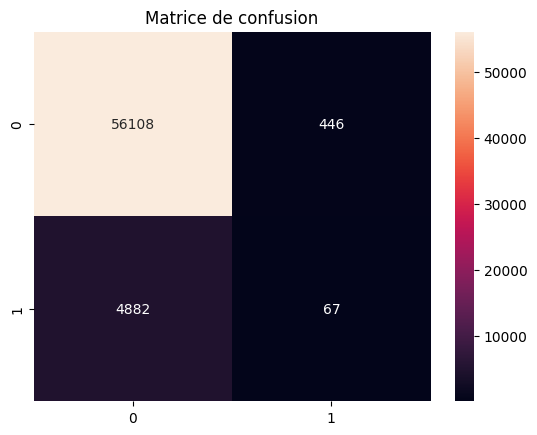

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_val = model.predict(X_val_split)

print("Accuracy:", accuracy_score(y_val_split, y_pred_val))
print("Classification Report:\n", classification_report(y_val_split, y_pred_val))
sns.heatmap(confusion_matrix(y_val_split, y_pred_val), annot=True, fmt='d')
plt.title("Matrice de confusion")
plt.show()


MODEL 2 - RANDOM FOREST - Balanced

In [30]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_split, y_train_split)


RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 0.9089312716452856
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     56554
           1       0.10      0.02      0.03      4949

    accuracy                           0.91     61503
   macro avg       0.51      0.50      0.49     61503
weighted avg       0.85      0.91      0.88     61503



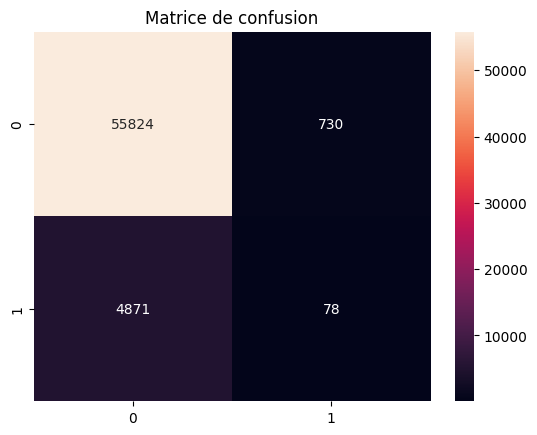

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_val = model.predict(X_val_split)

print("Accuracy:", accuracy_score(y_val_split, y_pred_val))
print("Classification Report:\n", classification_report(y_val_split, y_pred_val))
sns.heatmap(confusion_matrix(y_val_split, y_pred_val), annot=True, fmt='d')
plt.title("Matrice de confusion")
plt.show()


In [32]:
import joblib
from tensorflow.keras.models import load_model

# Enregistrer le modèle
joblib.dump(model, 'random_forest_model2.h5')


# # Test avec une nouvelle donnée
# y_pred_example_loaded = loaded_model.predict(test_example_scaled)
# print("Prédiction avec le modèle chargé :", y_pred_example_loaded)


2025-05-09 16:07:41.621254: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


['random_forest_model2.h5']

In [33]:
# Vérifie les colonnes utilisées pour l'entraînement
print(X_train.columns)


Index(['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
       'FLAG_EMP_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')


xgboost Model

In [34]:
# %pip install xgboost

In [35]:
from xgboost import XGBClassifier

# Initialisation du modèle avec ajustement pour les classes déséquilibrées
xgb_model = XGBClassifier(scale_pos_weight= (len(y_train) - sum(y_train)) / sum(y_train))
xgb_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = xgb_model.predict(X_test)


Accuracy: 0.6496268474708551
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.65      0.77     56554
           1       0.14      0.68      0.24      4949

    accuracy                           0.65     61503
   macro avg       0.55      0.66      0.50     61503
weighted avg       0.89      0.65      0.73     61503



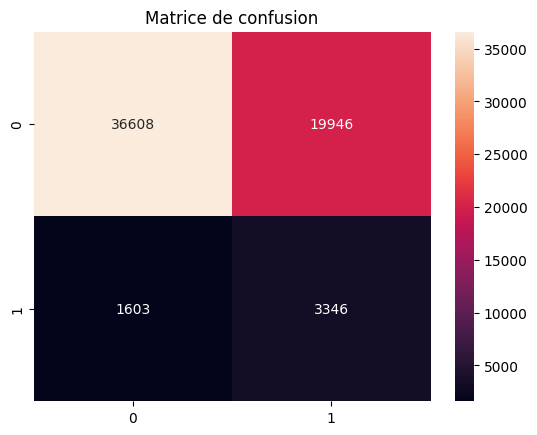

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_val = xgb_model.predict(X_val_split)

print("Accuracy:", accuracy_score(y_val_split, y_pred_val))
print("Classification Report:\n", classification_report(y_val_split, y_pred_val))
sns.heatmap(confusion_matrix(y_val_split, y_pred_val), annot=True, fmt='d')
plt.title("Matrice de confusion")
plt.show()


In [37]:
joblib.dump(xgb_model, 'random_forest_model3.h5')


['random_forest_model3.h5']

In [38]:
y_test_pred = model.predict(X_test)


Avec SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Créer une instance de SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE sur les données d'entraînement
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Afficher la distribution des classes après SMOTE
print(f"Avant SMOTE: {Counter(y_train)}")
print(f"Après SMOTE: {Counter(y_train_smote)}")

Avant SMOTE: Counter({0: 282686, 1: 24825})
Après SMOTE: Counter({1: 282686, 0: 282686})


Avant SMOTE: Counter({0: 282686, 1: 24825})
Après SMOTE: Counter({1: 282686, 0: 282686})
Accuracy: 0.9953498203339675
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56554
           1       0.98      0.96      0.97      4949

    accuracy                           1.00     61503
   macro avg       0.99      0.98      0.98     61503
weighted avg       1.00      1.00      1.00     61503



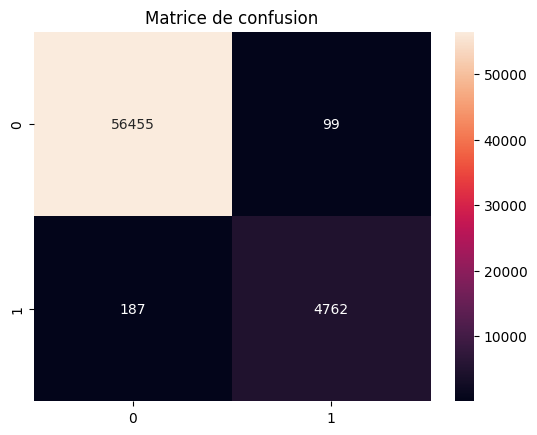

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Afficher la distribution des classes
print(f"Avant SMOTE: {Counter(y_train)}")
print(f"Après SMOTE: {Counter(y_train_smote)}")

# Entraîner le modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Évaluer le modèle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_val = model.predict(X_val_split)

print("Accuracy:", accuracy_score(y_val_split, y_pred_val))
print("Classification Report:\n", classification_report(y_val_split, y_pred_val))
sns.heatmap(confusion_matrix(y_val_split, y_pred_val), annot=True, fmt='d')
plt.title("Matrice de confusion")
plt.show()

Avant SMOTE: Counter({0: 282686, 1: 24825})
Après SMOTE: Counter({1: 282686, 0: 282686})
Accuracy: 0.9195161211648212
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.47      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.70      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



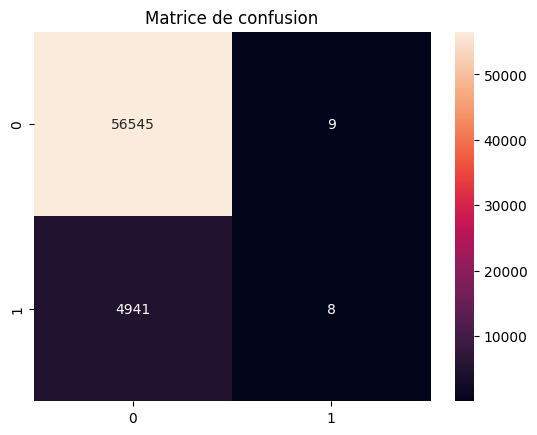

In [41]:
from xgboost import XGBClassifier

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Afficher la distribution des classes
print(f"Avant SMOTE: {Counter(y_train)}")
print(f"Après SMOTE: {Counter(y_train_smote)}")

# Entraîner le modèle XGBoost
xgb_model = XGBClassifier(scale_pos_weight=1)  # Pas besoin de `scale_pos_weight` après SMOTE
xgb_model.fit(X_train_smote, y_train_smote)

# Évaluer le modèle
y_pred_val = xgb_model.predict(X_val_split)

print("Accuracy:", accuracy_score(y_val_split, y_pred_val))
print("Classification Report:\n", classification_report(y_val_split, y_pred_val))
sns.heatmap(confusion_matrix(y_val_split, y_pred_val), annot=True, fmt='d')
plt.title("Matrice de confusion")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Afficher la distribution des classes après SMOTE
print(f"Avant SMOTE: {Counter(y_train)}")
print(f"Après SMOTE: {Counter(y_train_smote)}")

# Entraîner le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Entraîner le modèle XGBoost
xgb_model = XGBClassifier(scale_pos_weight=1)  # Pas besoin de `scale_pos_weight` après SMOTE
xgb_model.fit(X_train_smote, y_train_smote)

# Sauvegarder les modèles   
joblib.dump(rf_model, '../models/random_forest_smote_model.h5')
joblib.dump(xgb_model, '../models/xgboost_smote_model.h5')

Avant SMOTE: Counter({0: 282686, 1: 24825})
Après SMOTE: Counter({1: 282686, 0: 282686})


['../models/xgboost_smote_model.h5']

In [ ]:
import numpy as np
import pandas as pd

# Charger les modèles
rf_model = joblib.load('../models/random_forest_smote_model.h5')
xgb_model = joblib.load('../models/xgboost_smote_model.h5')

# Charger le scaler utilisé pendant l'entraînement
scaler = StandardScaler()
scaler.fit(X_train)  # Assurez-vous que le scaler est ajusté sur les données d'entraînement

# Exemple de données pour un profil apte à rembourser
profile_apt = {
    'CNT_CHILDREN': [0],
    'AMT_CREDIT': [200000],
    'AMT_GOODS_PRICE': [180000],
    'DAYS_EMPLOYED': [-5000],
    'FLAG_EMP_PHONE': [1],
    'CNT_FAM_MEMBERS': [2],
    'REGION_RATING_CLIENT': [1],
    'REGION_RATING_CLIENT_W_CITY': [1],
    'REG_REGION_NOT_WORK_REGION': [0],
    'LIVE_REGION_NOT_WORK_REGION': [0],
    'REG_CITY_NOT_WORK_CITY': [0],
    'LIVE_CITY_NOT_WORK_CITY': [0],
    'YEARS_BEGINEXPLUATATION_AVG': [0.9],
    'FLOORSMAX_AVG': [0.8],
    'YEARS_BEGINEXPLUATATION_MODE': [0.9],
    'FLOORSMAX_MODE': [0.8],
    'YEARS_BEGINEXPLUATATION_MEDI': [0.9],
    'FLOORSMAX_MEDI': [0.8],
    'OBS_30_CNT_SOCIAL_CIRCLE': [0],
    'DEF_30_CNT_SOCIAL_CIRCLE': [0],
    'OBS_60_CNT_SOCIAL_CIRCLE': [0],
    'DEF_60_CNT_SOCIAL_CIRCLE': [0]
}

# Exemple de données pour un profil à risque élevé
profile_risk = {
    'CNT_CHILDREN': [3],
    'AMT_CREDIT': [1500000],
    'AMT_GOODS_PRICE': [1400000],
    'DAYS_EMPLOYED': [-100],
    'FLAG_EMP_PHONE': [0],
    'CNT_FAM_MEMBERS': [6],
    'REGION_RATING_CLIENT': [3],
    'REGION_RATING_CLIENT_W_CITY': [3],
    'REG_REGION_NOT_WORK_REGION': [1],
    'LIVE_REGION_NOT_WORK_REGION': [1],
    'REG_CITY_NOT_WORK_CITY': [1],
    'LIVE_CITY_NOT_WORK_CITY': [1],
    'YEARS_BEGINEXPLUATATION_AVG': [0.2],
    'FLOORSMAX_AVG': [0.1],
    'YEARS_BEGINEXPLUATATION_MODE': [0.2],
    'FLOORSMAX_MODE': [0.1],
    'YEARS_BEGINEXPLUATATION_MEDI': [0.2],
    'FLOORSMAX_MEDI': [0.1],
    'OBS_30_CNT_SOCIAL_CIRCLE': [15],
    'DEF_30_CNT_SOCIAL_CIRCLE': [10],
    'OBS_60_CNT_SOCIAL_CIRCLE': [12],
    'DEF_60_CNT_SOCIAL_CIRCLE': [8]
}

# Convertir les données en DataFrame
profile_apt_df = pd.DataFrame(profile_apt)
profile_risk_df = pd.DataFrame(profile_risk)

# Appliquer la transformation avec le scaler
profile_apt_scaled = scaler.transform(profile_apt_df)
profile_risk_scaled = scaler.transform(profile_risk_df)

# Prédire avec les modèles
rf_prediction_apt = rf_model.predict(profile_apt_scaled)
rf_prediction_risk = rf_model.predict(profile_risk_scaled)

xgb_prediction_apt = xgb_model.predict(profile_apt_scaled)
xgb_prediction_risk = xgb_model.predict(profile_risk_scaled)

# Afficher les résultats
print("Random Forest - Profil apte à rembourser :", rf_prediction_apt)
print("Random Forest - Profil à risque élevé :", rf_prediction_risk)

print("XGBoost - Profil apte à rembourser :", xgb_prediction_apt)
print("XGBoost - Profil à risque élevé :", xgb_prediction_risk)

NameError: name 'joblib' is not defined

In [ ]:
print("Distribution des classes dans y_train :", Counter(y_train))

Distribution des classes dans y_train : Counter({0: 282686, 1: 24825})
